In [59]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm

In [60]:
neg = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_test_negative2.zarr')
neg = neg.compute()

In [61]:
pos = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_test_positive7.zarr')
pos = pos.compute()

In [62]:
pos

<xarray.Dataset>
Dimensions:           (trajectory: 100, obs: 72)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 6 7 8 ... 64 65 66 67 68 69 70 71
  * trajectory        (trajectory) int64 0 1 2 3 4 5 6 ... 93 94 95 96 97 98 99
Data variables: (12/25)
    abs_salinity      (trajectory, obs) float32 34.75 34.75 34.75 ... nan nan
    beta              (trajectory, obs) float32 1.342 1.342 1.342 ... nan nan
    bottom            (trajectory, obs) float32 5.5e+03 5.5e+03 ... nan nan
    cons_temperature  (trajectory, obs) float32 0.755 0.7429 0.7481 ... nan nan
    density           (trajectory, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diffusion         (trajectory, obs) float32 0.0 1.263e-16 ... nan nan
    ...                ...
    u                 (trajectory, obs) float32 0.0 3.982e-07 ... nan nan
    v                 (trajectory, obs) float32 0.0 -4.651e-07 ... nan nan
    v_s               (trajectory, obs) float32 9.598e-08 9.597e-08 ... nan nan
    w                 (trajectory, obs) float32 0.0 -0.0002678 ... nan nan
    z                 (trajectory, obs) float64 5e+03 5.021e+03 ... nan nan
    z_kz              (trajectory, obs) float32 0.0 -0.1965 -0.1822 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.1-46-g28f231fa

In [63]:
nodiif = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_65_noKz.zarr')
nodiff = nodiif.compute()

Text(0, 0.5, 'Depth [m]')

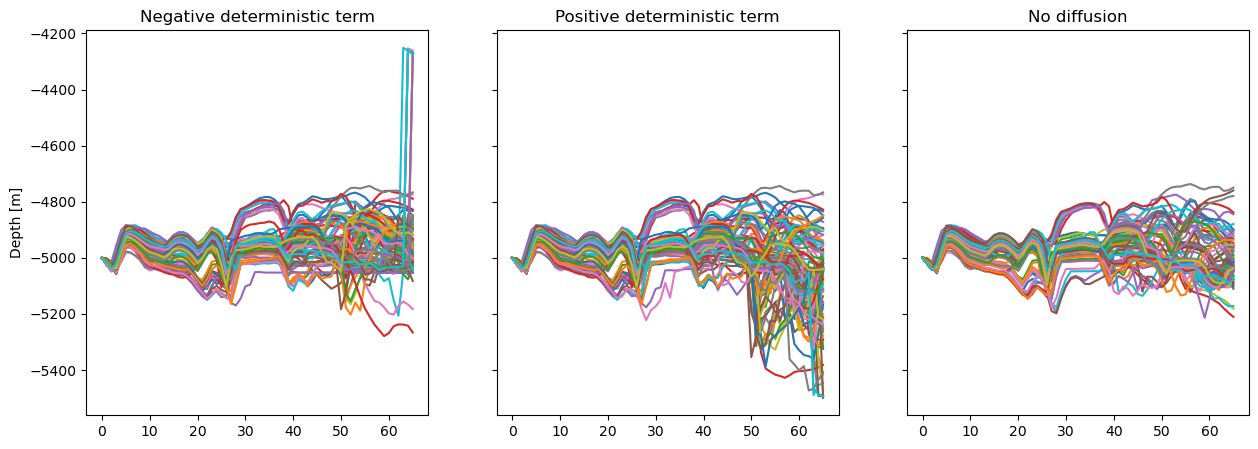

In [64]:
# make a plot with three subplots in one figure with shared yaxis
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(15, 5))

for i in range(100):
    axes[0].plot(-neg['z'][i,:])
    axes[1].plot(-pos['z'][i,:])
    axes[2].plot(-nodiff['z'][i,:])
    
axes[0].set_title('Negative deterministic term')
axes[1].set_title('Positive deterministic term')
axes[2].set_title('No diffusion')

axes[0].set_ylabel('Depth [m]')

Text(0, 0.5, 'Mean depth displacement [m]')

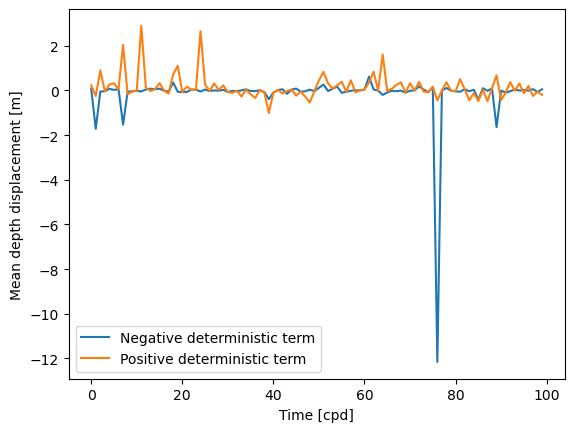

In [68]:
neg['z_kz'].mean(dim='obs').plot(label='Negative deterministic term')
pos['z_kz'].mean(dim='obs').plot(label='Positive deterministic term')
plt.legend()
plt.xlabel('Time [cpd]')
plt.ylabel('Mean depth displacement [m]')

Text(0, 0.5, 'STD depth displacement [m]')

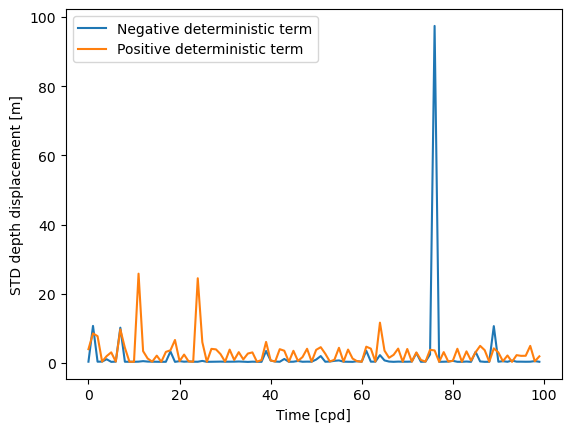

In [69]:
neg['z_kz'].std(dim='obs').plot(label='Negative deterministic term')
pos['z_kz'].std(dim='obs').plot(label='Positive deterministic term')
plt.legend()
plt.xlabel('Time [cpd]')
plt.ylabel('STD depth displacement [m]')

Text(0, 0.5, 'Depth (m)')

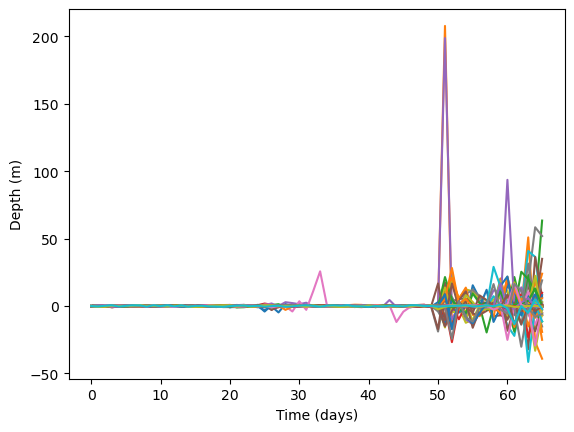

In [70]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    plt.plot(pos['z_kz'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')


Text(0, 0.5, 'Depth (m)')

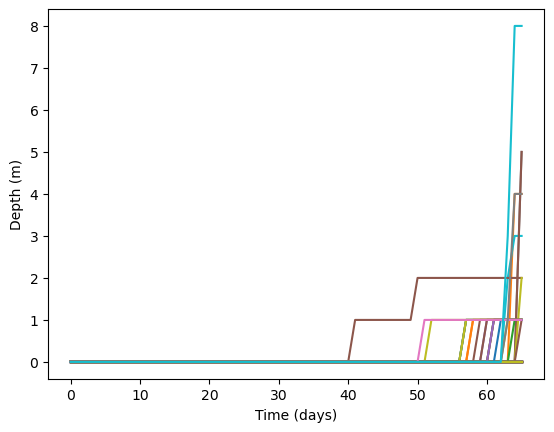

In [71]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    plt.plot(pos['floored'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')


Text(0, 0.5, 'Latitude')

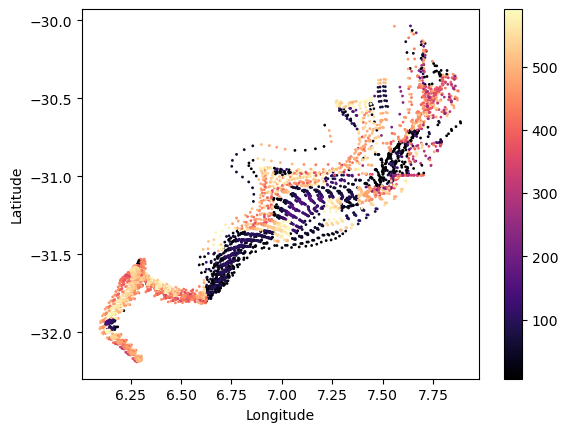

In [76]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    im = plt.scatter(pos['lon'][i,:], pos['lat'][i,:], 
                     c=pos['bottom'][i,:] - pos['z'][i,:], cmap='magma',
                     s=1)
    
plt.colorbar(im)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

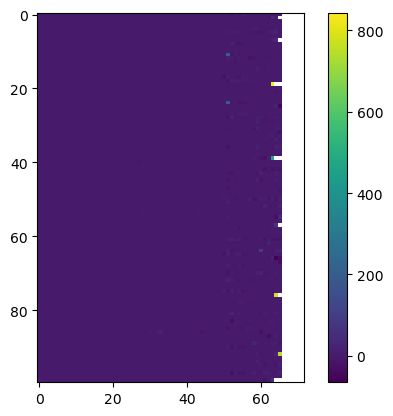

In [10]:
plt.imshow(pos['z_kz'])
plt.colorbar()

Text(0.5, 1.0, 'Difference between bottom depth and particle depth')

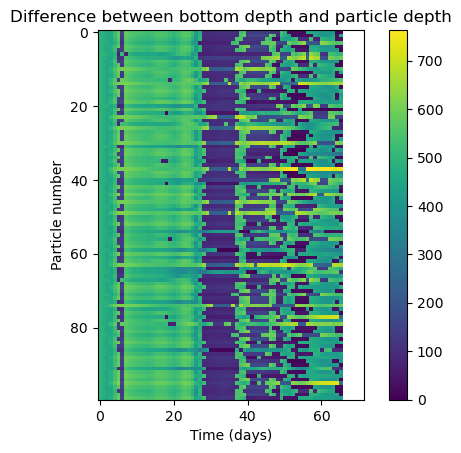

In [80]:
plt.imshow(nodiff['bottom'] - nodiff['z'])
plt.colorbar()
plt.xlabel('Time (days)')
plt.ylabel('Particle number')
plt.title('Difference between bottom depth and particle depth')

Text(0.5, 1.0, 'Difference between bottom depth and particle depth')

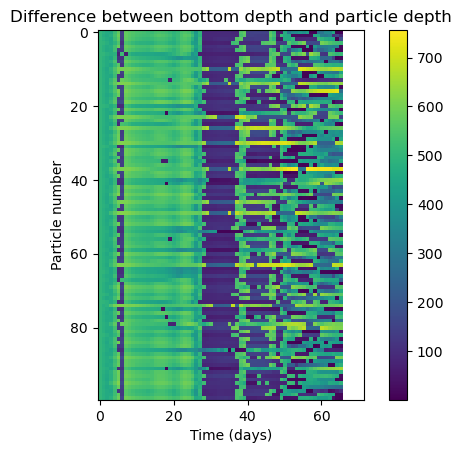

In [79]:
plt.imshow(pos['bottom']-pos['z'])
plt.colorbar()
plt.xlabel('Time (days)')
plt.ylabel('Particle number')
plt.title('Difference between bottom depth and particle depth')

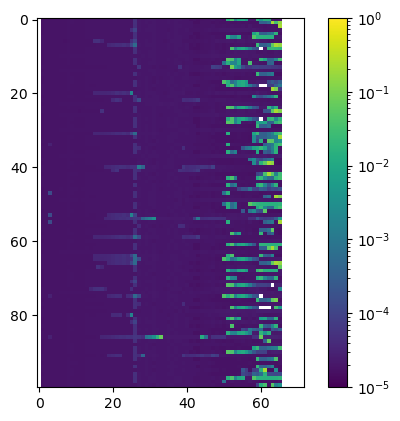

In [78]:
from matplotlib.colors import LogNorm 
plt.imshow(pos['kz'], norm=LogNorm(vmin=1e-5, vmax=1e0))
plt.colorbar()

In [14]:
max_z_index = np.zeros_like(pos.obs.values)

for j in pos.obs.values:
    max_z_index[j] = np.argmax(pos['z_kz'][:, j].values, axis=0)

In [28]:
max_z_index[60:]

array([64, 52, 62, 19, 19,  1,  0,  0,  0,  0,  0,  0], dtype=int32)

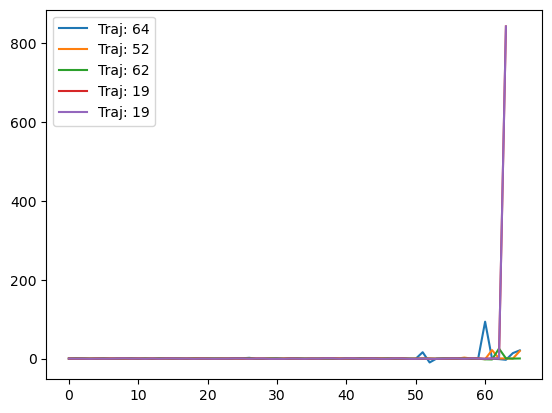

In [32]:
for traj in max_z_index[60:65]:
    plt.plot(pos['z_kz'][traj, :].values, label= 'Traj: ' + str(traj))
    
plt.legend()  

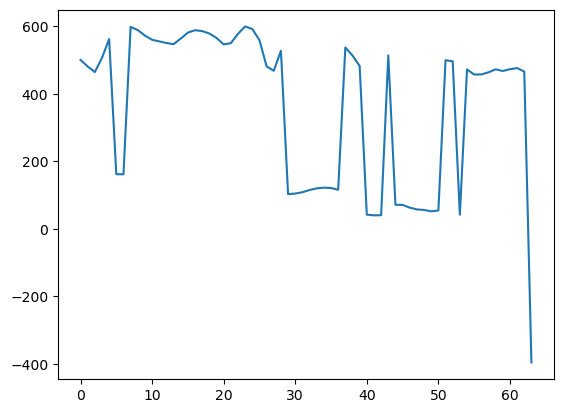

In [38]:
plt.plot(pos['bottom'][19, :] - pos['z'][19, :])

[]

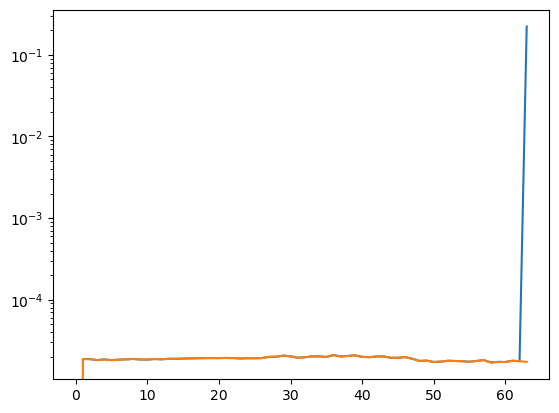

In [36]:
plt.plot(pos['kz'][19, :])
plt.plot(pos['kzdz'][19, :])

plt.semilogy()

Text(0.5, 1.0, 'Negative sign in deterministic term diffusion')

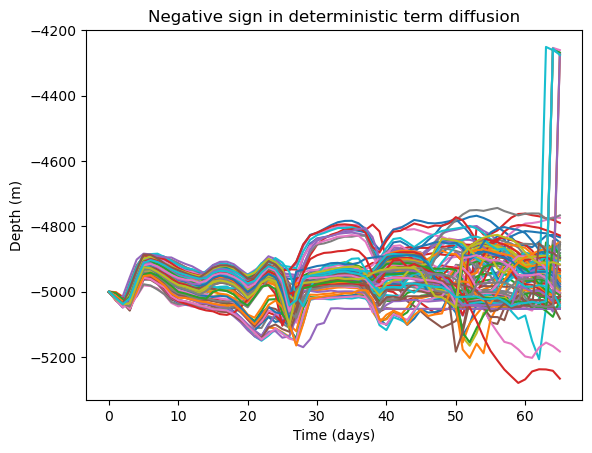

In [17]:
for i in range(100):
    plt.plot(-neg['z'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')
plt.title('Negative sign in deterministic term diffusion')

In [ ]:
for i in range(100):
    plt.plot(-neg['z'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')
plt.title('Negative sign in deterministic term diffusion')